In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
print("Training set shape",X_train.shape)

Training set shape (60000, 28, 28)


In [3]:
print("Test set shape:", X_test.shape)

Test set shape: (10000, 28, 28)


In [4]:
from tensorflow.keras.utils import to_categorical

X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

print("One-hot encoded label example:", y_train_cat[0])

One-hot encoded label example: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


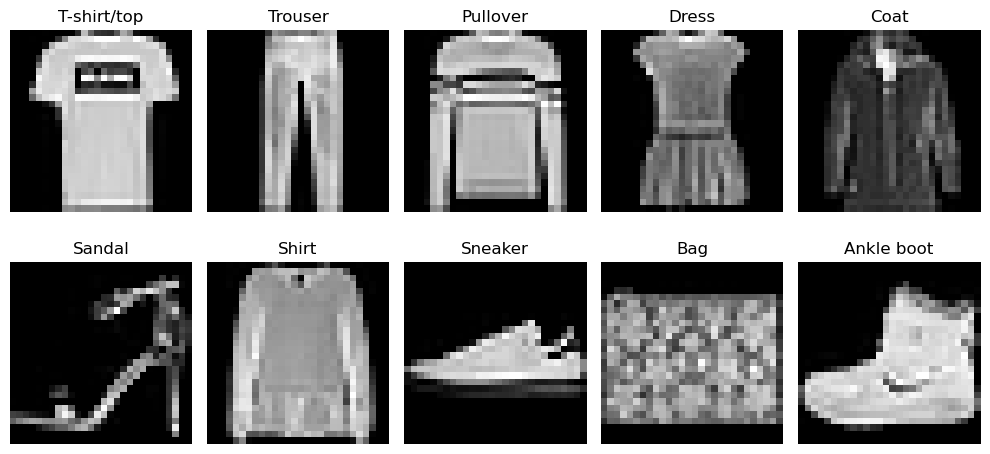

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,5))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx],cmap = 'gray')
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
from sklearn.model_selection import train_test_split

X_train_final,X_val,y_train_final,y_val = train_test_split(X_train,y_train_cat,test_size=0.2,random_state=42)

X_train_final.shape,X_val.shape,y_train_final.shape,y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000, 10), (12000, 10))

In [11]:
history = model.fit(
    X_train_final, y_train_final,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7285 - loss: 0.8006 - val_accuracy: 0.8460 - val_loss: 0.4374
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8546 - loss: 0.4098 - val_accuracy: 0.8561 - val_loss: 0.3950
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8683 - loss: 0.3675 - val_accuracy: 0.8698 - val_loss: 0.3628
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8783 - loss: 0.3368 - val_accuracy: 0.8683 - val_loss: 0.3603
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8857 - loss: 0.3113 - val_accuracy: 0.8720 - val_loss: 0.3500
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8920 - loss: 0.2947 - val_accuracy: 0.8689 - val_loss: 0.3602
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8965 - loss: 0.2817 - val_accuracy: 0.8815 - val_loss: 0.3346
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9006 - loss: 0.2693 - val_accuracy: 0.

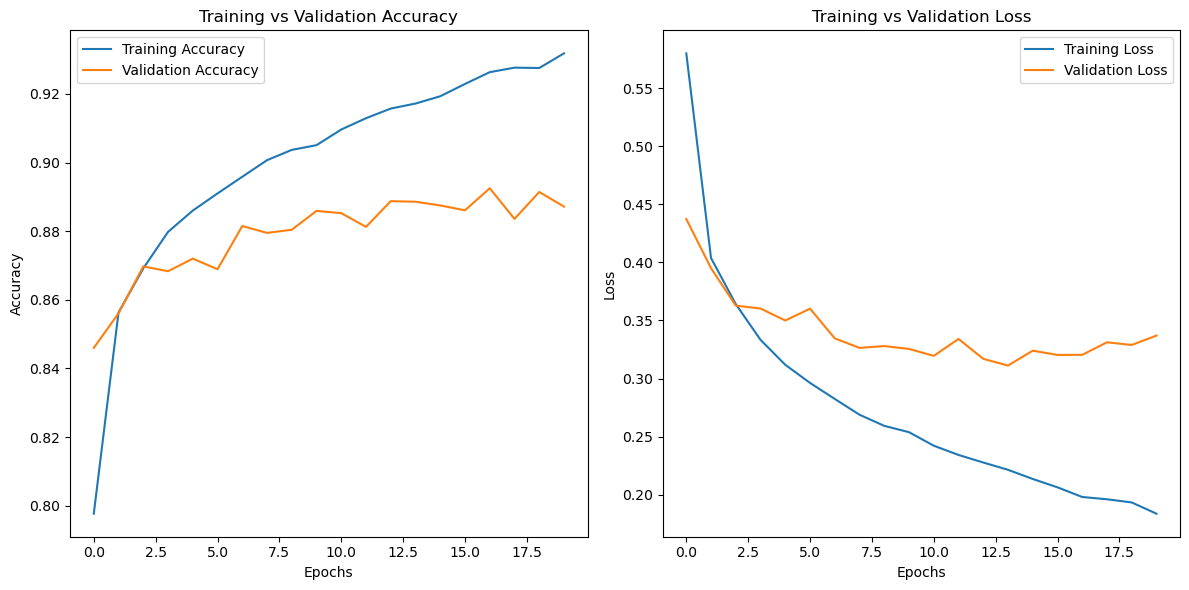

In [12]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")

plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
test_loss,test_accuracy = model.evaluate(X_test,y_test_cat,verbose = 0)
print(f"Test Accuracy:{test_accuracy:.4f}")
print(f"Test loss:{test_loss:.4f}")

Test Accuracy:0.8760
Test loss:0.3626


In [15]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs,axis = 1)
y_true = np.argmax(y_test_cat,axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


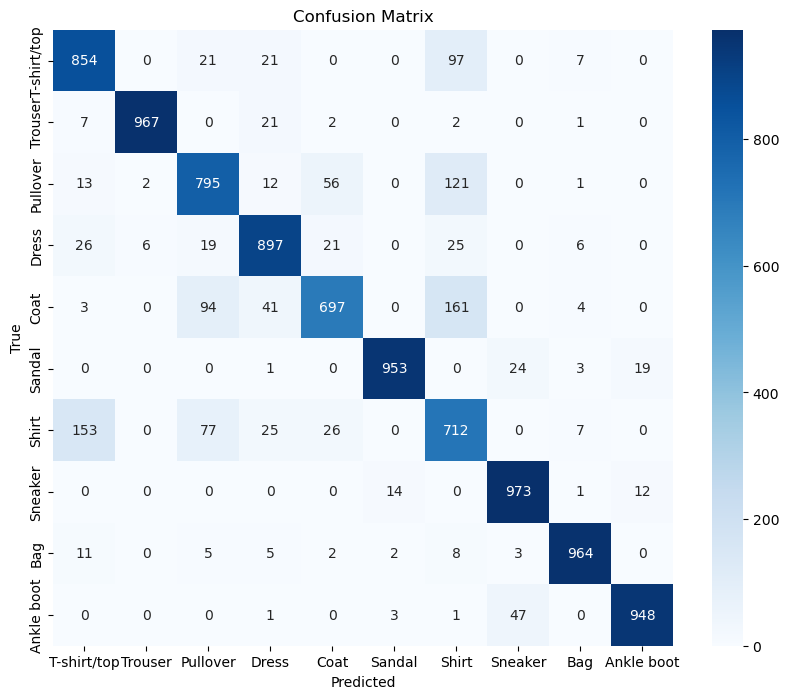

In [16]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [17]:
cr = classification_report(y_true,y_pred,target_names=class_names)
print("Classification Report:\n",cr)

Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.80      0.85      0.83      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.80      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.87      0.70      0.77      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.63      0.71      0.67      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

